# Selection algorithms

In [1]:
# Community simulator package
from IPython.display import Image
from community_simulator import *
from community_simulator.usertools import *
from community_simulator.visualization import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends import backend_pdf as bpdf
import numpy as np
import scipy as sp
colors = sns.color_palette()
%matplotlib inline

# Community selection package
from community_selection import *
from community_selection.A_experiment_functions import *
from community_selection.B_community_phenotypes import *
from community_selection.C_selection_algorithms import *
from community_selection.D_migration_algorithms import *
from community_selection.usertools import *

In [2]:
# Make dynanmics by default we will use the microbial consumer resource model
def dNdt(N,R,params):
    return MakeConsumerDynamics(assumptions)(N,R,params)
def dRdt(N,R,params):
    return MakeResourceDynamics(assumptions)(N,R,params)
dynamics = [dNdt,dRdt]

# Global parameters
## Default parameters from community-simulator
## !!!Don't touch this dictionary!!!
assumptions = a_default.copy() # Start with default parameters

## Update parameters for community-selection
assumptions.update({
    'SA': 2100 * np.ones(1), #Number of species in each specialist family (here, 3 families of 60 species)
    'MA': 90 * np.ones(1), #Number of resources in each class
    'Sgen': 0, #Number of generalist species (unbiased sampling over alll resource classes)
    "n_wells": 10,
    "m": 0, # Mortality
    "scale": 10**6,  #scale is a conversion factor specifying the number of individual microbial cells present when N = 1.
    "sigma" : 1, # Standard deviation for drawing specifc speices/interaction function
    "alpha": 1, # Scaling factor between species- and interaction-specific function variances
    "l": 0, # Set leakage function to 0 to switch off cross-feeding
    "response": "type III",
    "sigma_max": 5,
    'R0_food': 1000, # Total amount of supplied food
    "rich_medium": True, # Number of food types passed to R0
    "binary_threshold": 1,  
    # The parameters below will be passed to params_simulation
    "n_propagation": 1, # Length of propagation, or hours within a growth cycle
    "n_transfer": 10, # Number of total transfer, or number of passage
    "n_transfer_selection": 5, # Number of transfer implementing seleciton regimes
    "dilution": 1/1000, # Dilution factor at every transfer
    "n_inoc": 10**6,  #Number of cells sampled from the regional species at start
    "selected_function": "f1_additive"
})

# Prepare experiment setup in this universe
seed_temp = 1
params, params_simulation = prepare_experiment(assumptions, seed = seed_temp)

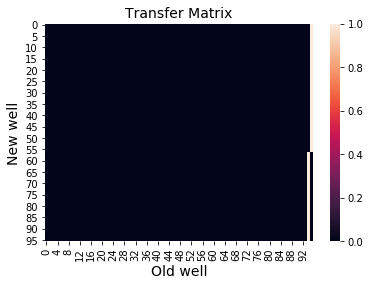

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1])

In [5]:
community_function = range(96)
p=0.25
n_wells = len(community_function)
sorted_community_function = np.sort(community_function)
cut_off = sorted_community_function[int(np.round(len(community_function)*(1-p))) - 1]
winner_index = np.where(community_function >= cut_off)[0][::-1] # Reverse the list so the higher 

plot_transfer_matrix(select_top_dog(range(96)))
#list(winner_index)
np.random.binomial(1, 0.25, 10**2)
#[list(winner_index)[0]] * int(0.6 * n_wells) + [list(winner_index)[1]] * int(0.4 * n_wells + 2)

In [11]:
data_directory = "data/test/"

list_phenotypes = ["f1_additive"]
#list_phenotypes = ["f6_resident_growth", "f7_resident_growth_community", "f8_resident_growth_environment"]
#list_phenotypes = ["f1_additive", "f2_interaction", "f3_additive_binary", "f4_interaction_binary", "f5_invader_growth", "f6_resident_growth"]

#list_algorithms = ["knock_in_isolates"]
list_algorithms = ["simple_screening", "resource", "knock_in_isolates"]
#list_algorithms = ["simple_screening", "directed_selection_migration", "pair_top_communities", "multiple_pair_top", "Blouin2015", "Mueller2019", "Panke_Buisse2015", "Swenson2000a", "Swenson2000b", "Williams2007a", "Williams2007b", "Wright2019", "coalescence", "migration", "resource", "bottleneck", "knock_out", "knock_in"]


for j in range(len(list_phenotypes)):
    # Parameters for simulation
    params_simulation.update({"selected_function": list_phenotypes[j]}) # selected function

    # Make the list of algorithms
    algorithms = make_algorithms(params_simulation)

    # Simulation
    for i in range(len(list_algorithms)):
        simulate_community(
            assumptions = assumptions,
            params = params,
            dynamics = dynamics,
            params_simulation = params_simulation,
            params_algorithm = algorithms[algorithms["algorithm_name"] == list_algorithms[i]],
            write_composition = True,
            write_function = True,
            file_name = data_directory + "SP" + str(seed_temp) + "-" + list_algorithms[i],
            assembly_type = str(list_algorithms[i]),
        )


Algorithm: simple_screening


 transfer community_phenotype selection_algorithm migration_algorithm
        1         f1_additive        no_selection        no_migration
        2         f1_additive        no_selection        no_migration
        3         f1_additive        no_selection        no_migration
        4         f1_additive        no_selection        no_migration
        5         f1_additive        no_selection        no_migration
        6         f1_additive        no_selection        no_migration
        7         f1_additive        no_selection        no_migration
        8         f1_additive        no_selection        no_migration
        9         f1_additive        no_selection        no_migration
       10         f1_additive        no_selection        no_migration

Generating initial plate

Adding attributes that are essential to the community function to the plate object

Start propogation
Transfer 1
Transfer 6

Algorithm simple_screening finished

Algorithm:

In [4]:
data_directory = "data/test/"
list_phenotypes = ["f2_interaction"]
list_algorithms = ["simple_screening", "resource", "knock_in_isolates"]

for j in range(len(list_phenotypes)):
    # Parameters for simulation
    params_simulation.update({"selected_function": list_phenotypes[j]}) # selected function

    # Make the list of algorithms
    algorithms = make_algorithms(params_simulation)

    # Simulation
    for i in range(len(list_algorithms)):
        simulate_community(
            assumptions = assumptions,
            params = params,
            dynamics = dynamics,
            params_simulation = params_simulation,
            params_algorithm = algorithms[algorithms["algorithm_name"] == list_algorithms[i]],
            write_composition = True,
            write_function = True,
            file_name = data_directory + "SP" + str(seed_temp) + "-" + list_algorithms[i],
            assembly_type = str(list_algorithms[i]),
        )


Algorithm: simple_screening


 transfer community_phenotype selection_algorithm migration_algorithm
        1      f2_interaction        no_selection        no_migration
        2      f2_interaction        no_selection        no_migration
        3      f2_interaction        no_selection        no_migration
        4      f2_interaction        no_selection        no_migration
        5      f2_interaction        no_selection        no_migration
        6      f2_interaction        no_selection        no_migration
        7      f2_interaction        no_selection        no_migration
        8      f2_interaction        no_selection        no_migration
        9      f2_interaction        no_selection        no_migration
       10      f2_interaction        no_selection        no_migration

Generating initial plate

Adding attributes that are essential to the community function to the plate object

Start propogation
Transfer 1
Transfer 6

Algorithm simple_screening finished

Algorithm:

In [5]:
list_phenotypes = ["f1_additive"]
list_algorithms = ["knock_in_isolates"]
#list_phenotypes = ["f5_invader_growth"]
#list_algorithms = ["simple_screening"]
i = 0; j = 0
params_simulation.update({"selected_function": list_phenotypes[j]}) # selected function
algorithms = make_algorithms(params_simulation)
params_algorithm = algorithms[algorithms["algorithm_name"] == list_algorithms[i]]
assumptions.update({"n_wells": np.sum(assumptions["SA"])  + assumptions["Sgen"]})



# Set seeds
np.random.seed(2)

# Make initial state
init_state = MakeInitialState(assumptions)

# Make plate
plate = Community(init_state, dynamics, params, scale = assumptions["scale"], parallel = True) 

print(params_algorithm)
# Update the community composition by sampling from the pool
print("\nGenerating initial plate")
plate.N = sample_from_pool(plate.N, scale = assumptions["scale"], inocula = params_simulation["n_inoc"], monoculture = True)
if assumptions["rich_medium"]:
    plate.R = make_rich_medium(plate.R, assumptions)
    plate.R0 = make_rich_medium(plate.R, assumptions) # R0 for refreshing media on passaging if "refresh_resoruce" is turned on
#plate.N = plate.N / np.sum(plate.N, axis = 0) # Rescale 
#plate.Propagate(assumptions["n_propagation"])

#passage_monoculture(plate, assumptions["dilution"]).N
#plate = add_community_function(plate, dynamics, assumptions, params, params_simulation, params_algorithm)
#community_function = globals()[params_algorithm["community_phenotype"][0]](plate, assumptions = assumptions) # Community phenotype

#community_function

      algorithm_name  transfer community_phenotype selection_algorithm  \
0  knock_in_isolates         1         f1_additive        no_selection   
1  knock_in_isolates         2         f1_additive        no_selection   
2  knock_in_isolates         3         f1_additive        no_selection   
3  knock_in_isolates         4         f1_additive        no_selection   
4  knock_in_isolates         5         f1_additive          select_top   
5  knock_in_isolates         6         f1_additive        no_selection   
6  knock_in_isolates         7         f1_additive        no_selection   
7  knock_in_isolates         8         f1_additive        no_selection   
8  knock_in_isolates         9         f1_additive        no_selection   
9  knock_in_isolates        10         f1_additive        no_selection   

  migration_algorithm  
0        no_migration  
1        no_migration  
2        no_migration  
3        no_migration  
4        no_migration  
5        no_migration  
6        no_migra

In [6]:
plate.N

W0        W1        W2        W3        W4        W5  \
F0  S0     0.000001  0.000000  0.000000  0.000000  0.000000  0.000000   
F1  S1     0.000000  0.000001  0.000000  0.000000  0.000000  0.000000   
F2  S2     0.000000  0.000000  0.000001  0.000000  0.000000  0.000000   
GEN S3     0.000000  0.000000  0.000000  0.000001  0.000000  0.000000   
    S4     0.000000  0.000000  0.000000  0.000000  0.000001  0.000000   
    S5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000001   
    S6     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S7     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S8     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S9     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S10    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S12    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S13    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S15    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S16    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S17    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S18    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S19    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S20    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S21    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S22    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S23    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S24    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S25    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S26    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S27    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S28    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S29    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...             ...       ...       ...       ...       ...       ...   
    S2070  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2071  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2072  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2073  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2074  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2075  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2076  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2077  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2078  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2079  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2080  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2081  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2082  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2083  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2084  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2085  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2086  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2087  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2088  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2089  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2090  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2091  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
    S2092  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
  

In [33]:
community_function = f1_additive(plate, assumptions = assumptions) 
winning_index = np.where(community_function >= np.max(community_function))[0][0] 

#plate.isolate_function[:,None]
k = plate.N.columns[0]
temp = np.logical_and(np.array(plate.N[k]==0), (plate.isolate_function > community_function[winning_index]))
np.random.choice(np.where(temp))

ValueError: 'a' must be 1-dimensional

In [9]:
x = [1,2,3]
[x[0]] * 60 + [x[1]] * 40

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]